In [1]:
from skimage import color, io, measure, img_as_ubyte
from skimage.measure import profile_line
from skimage.transform import rescale, resize
import matplotlib.pyplot as plt
import numpy as np
import pydicom as dicom

Exercise 1

In [2]:
# Directory containing data and images
in_dir = "data/"

# X-ray image
im_name = "metacarpals.png"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
im_org = io.imread(in_dir + im_name)

Exercise 2

In [3]:
print(im_org.shape)

(512, 512)


Exercise 3

In [4]:
print(im_org.dtype)

uint8


Exercise 4

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1841975238.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1841975238.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


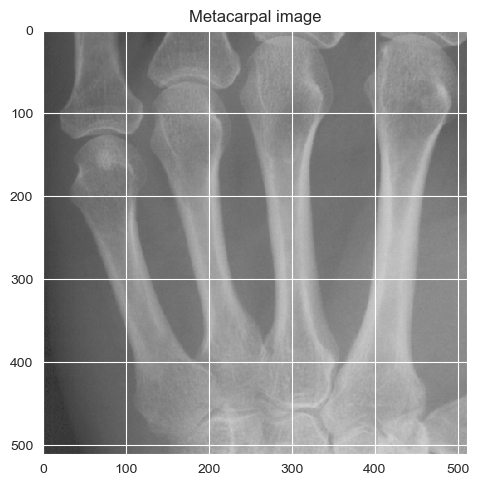

In [5]:
io.imshow(im_org)
plt.title('Metacarpal image')
io.show()

Exercise 5

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3023794420.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, cmap="jet")
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3023794420.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


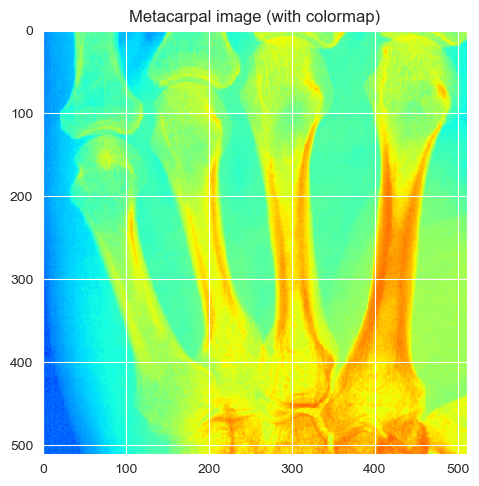

In [6]:
io.imshow(im_org, cmap="jet")
plt.title('Metacarpal image (with colormap)')
io.show()

exercise 6

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3098573882.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, vmin=20, vmax=170)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3098573882.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


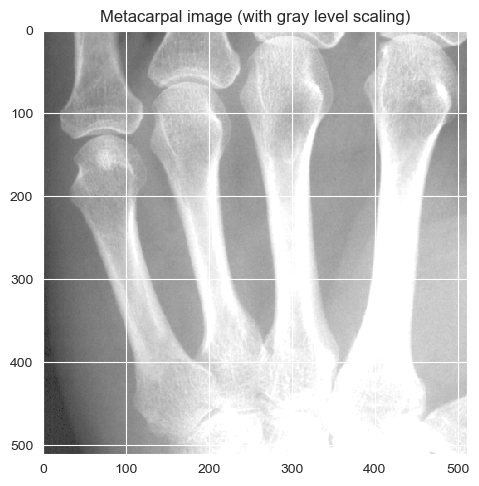

In [7]:
io.imshow(im_org, vmin=20, vmax=170)
plt.title('Metacarpal image (with gray level scaling)')
io.show()

Exercise 7

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3490923893.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3490923893.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


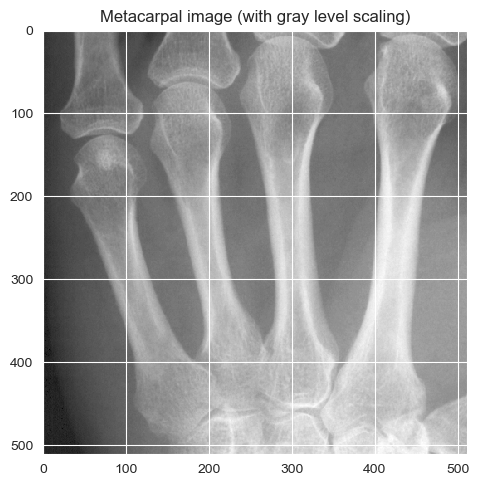

In [8]:
io.imshow(im_org, vmin=im_org.min(), vmax=im_org.max())
plt.title('Metacarpal image (with gray level scaling)')
io.show()

Exercise 8

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2990771614.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


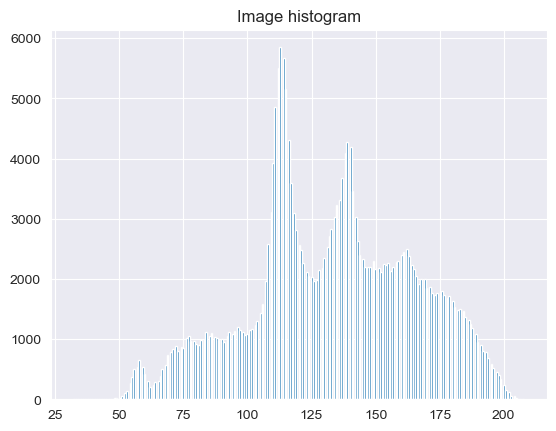

In [9]:
plt.hist(im_org.ravel(), bins=256)
plt.title('Image histogram')
io.show()

There are 1147.0 pixel values in bin 100


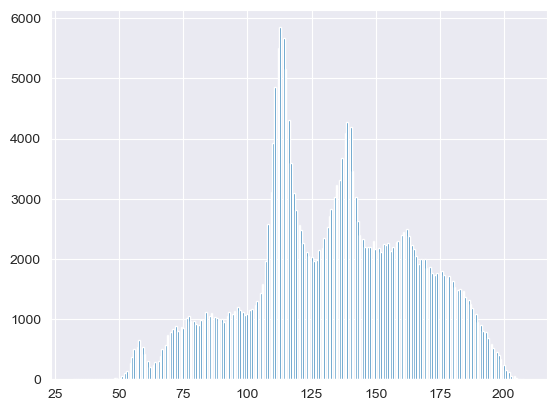

In [10]:
h = plt.hist(im_org.ravel(), bins=256)
bin_no = 100
count = h[0][bin_no]
print(f"There are {count} pixel values in bin {bin_no}")

Exercise 9

Max count is 5848.0
Max bin is 112.4375


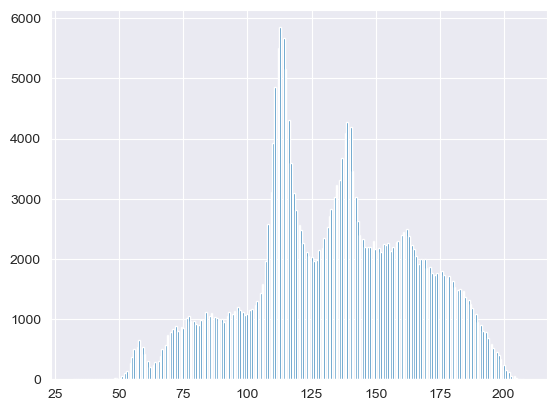

In [11]:
counts, bins, _ = plt.hist(im_org.ravel(), bins=256)
max_count = counts.max()
max_bin = bins[counts.argmax()]

print(f"Max count is {max_count}")
print(f"Max bin is {max_bin}")

Exercise 10

In [12]:
r = 110
c = 90
im_val = im_org[r, c]
print(f"The pixel value at (r,c) = ({r}, {c}) is: {im_val}")

The pixel value at (r,c) = (110, 90) is: 120


Exercise 11

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1934267334.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1934267334.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


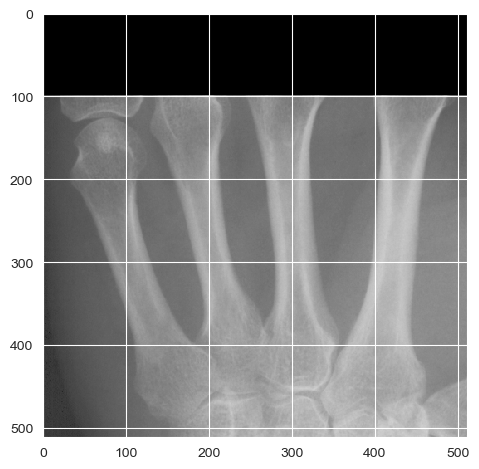

In [13]:
im_org[:100] = 0
io.imshow(im_org)
io.show()

Exercise 12

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1662018019.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(mask)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1662018019.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


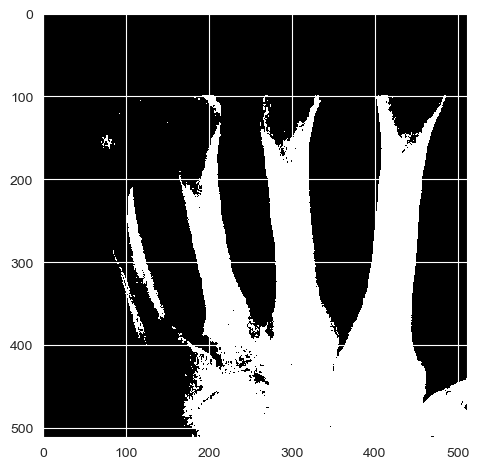

In [14]:
mask = im_org > 150
io.imshow(mask)
io.show()

The white pixels are the pixels that have a value of above 150

Exercise 13

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1061417362.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1061417362.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


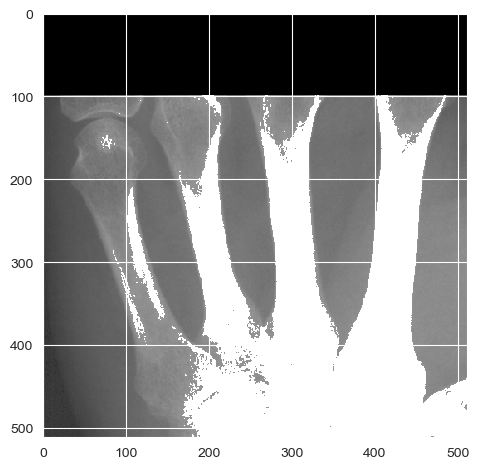

In [15]:
im_org[mask] = 255
io.imshow(im_org)
io.show()

This code turns every pixel that the mask has caught to 255 so it is completely white

Exercise 14

In [16]:
# color image
colIm_name = "ardeche.jpg"

# Read the image.
# Here the directory and the image name is concatenated
# by "+" to give the full path to the image.
colIm_org = io.imread(in_dir + colIm_name)

print(colIm_org.shape)
print(colIm_org.dtype)

(600, 800, 3)
uint8


The image has 512 rows and 512 columns

Exercise 15

In [17]:
print(f"r value = {colIm_org[110][90][0]}")
print(f"g value = {colIm_org[110][90][1]}")
print(f"b value = {colIm_org[110][90][2]}")

r value = 119
g value = 178
b value = 238


Exercise 16

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3584783852.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(colIm_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3584783852.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


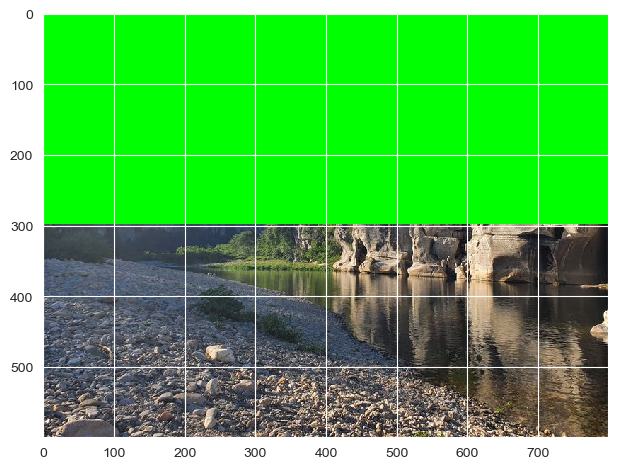

In [18]:
rows = colIm_org.shape[0]
half = rows // 2

colIm_org[:half, :] = [0, 255, 0]
io.imshow(colIm_org)
io.show()

Exercise 17

(894, 894, 3)
uint8


C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2481963513.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(ducks_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2481963513.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


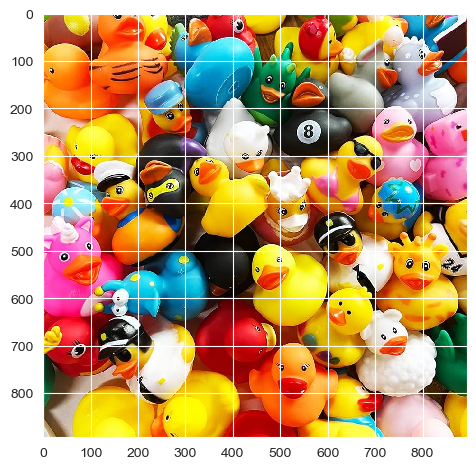

In [19]:
ducks_org = io.imread(in_dir + "ducks.jpg")
print(ducks_org.shape)
print(ducks_org.dtype)

io.imshow(ducks_org)
io.show()

size is 894, 894 and depth, or number of color pixels are still 3, so RGB

In [20]:
print("Red channel range:   ", ducks_org[:,:,0].min(), ducks_org[:,:,0].max())
print("Green channel range: ", ducks_org[:,:,1].min(), ducks_org[:,:,1].max())
print("Blue channel range:  ", ducks_org[:,:,2].min(), ducks_org[:,:,2].max())

Red channel range:    0 255
Green channel range:  0 255
Blue channel range:   0 255


still 0-255 range

Exercise 19

(400, 400, 3)


C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1073723444.py:7: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(image_resized)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1073723444.py:8: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


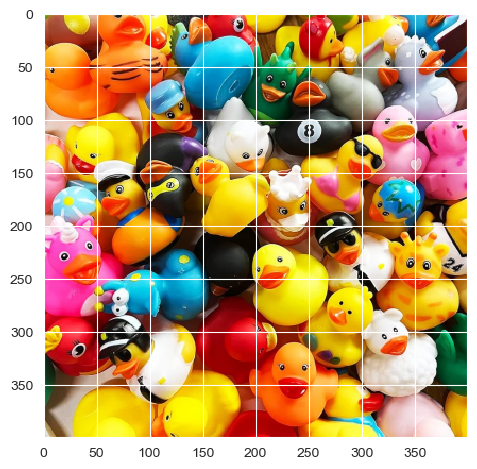

In [21]:
rows, cols = ducks_org.shape[0], ducks_org.shape[1]
scale = 400 / cols
rows_new = int(rows * scale)

image_resized = resize(ducks_org, (rows_new, 400), anti_aliasing=True)
print(image_resized.shape)
io.imshow(image_resized)
io.show()

Exercise 20

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\317604439.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_gray)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\317604439.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


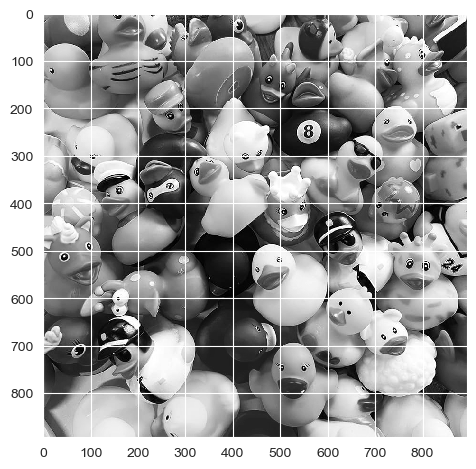

In [22]:
im_gray = color.rgb2gray(ducks_org)
im_byte = img_as_ubyte(im_gray)
io.imshow(im_gray)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3527915491.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


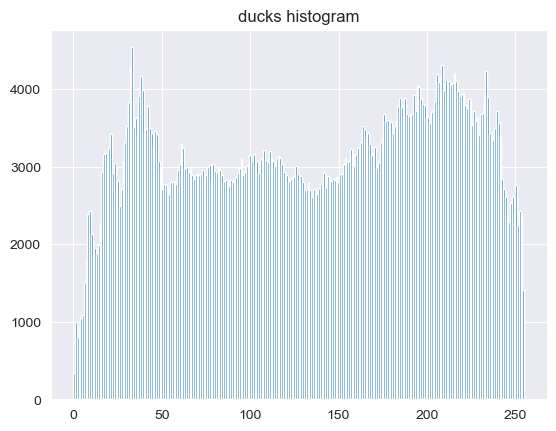

In [23]:
plt.hist(im_byte.ravel(), bins=256, range=(0, 255))
plt.title('ducks histogram')
io.show()

Exercise 20

Dont want to do this, a very dark image, most of the values will be to the left in the histogram and reverse for the bright image

Exercise 21

(720, 1280, 3)
uint8


C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3711297558.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(ball_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3711297558.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


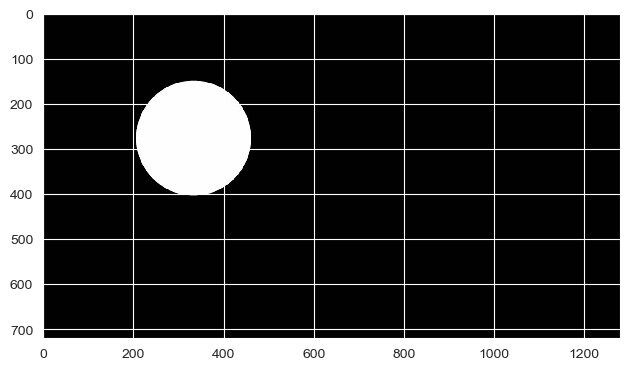

In [24]:
ball_org = io.imread(in_dir + "whiteBallBlackBackground.jpg")
print(ball_org.shape)
print(ball_org.dtype)

io.imshow(ball_org)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1733372943.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_gray)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1733372943.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


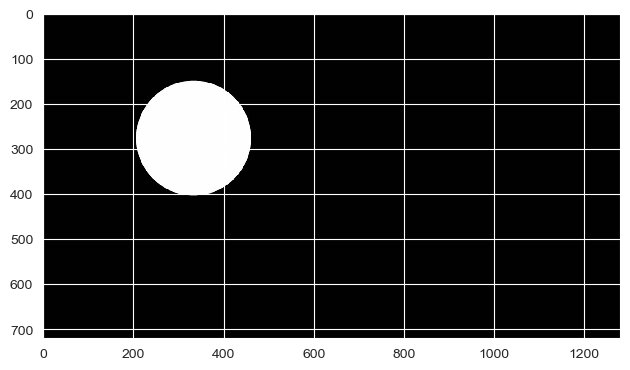

In [25]:
im_gray = color.rgb2gray(ball_org)
im_byte = img_as_ubyte(im_gray)
io.imshow(im_gray)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2730008976.py:3: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


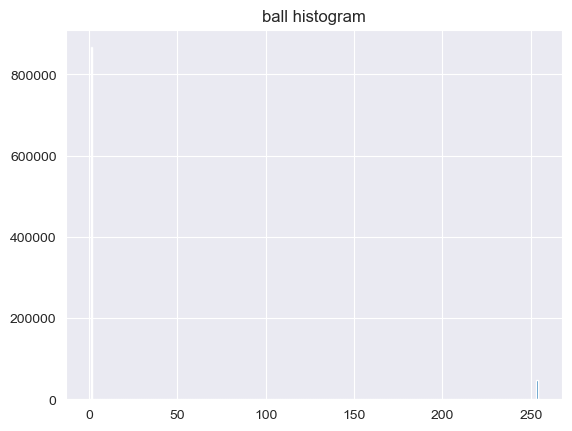

In [26]:
plt.hist(im_byte.ravel(), bins=256, range=(0, 255))
plt.title('ball histogram')
io.show()

Here you can see that most of the pixels are in the very low range, close to 0 and a small percentage of the pixels are white, 255

Exercise 22

(3024, 4032, 3)
uint8


C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1048351458.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dtu_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1048351458.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


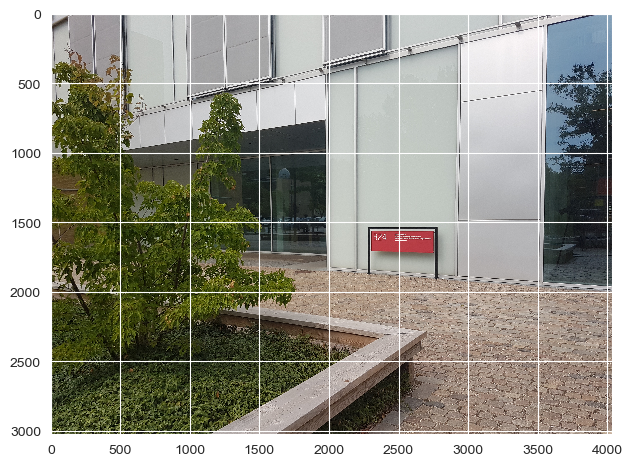

In [27]:
dtu_org = io.imread(in_dir + "DTUSign1.jpg")
print(dtu_org.shape)
print(dtu_org.dtype)

io.imshow(dtu_org)
io.show()

Exercise 23

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3046042813.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(r_comp)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\3046042813.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


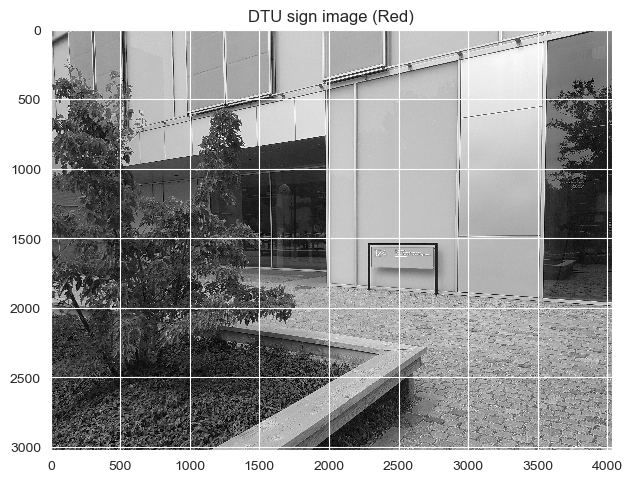

In [28]:
r_comp = dtu_org[:, :, 0]
io.imshow(r_comp)
plt.title('DTU sign image (Red)')
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2655403972.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(g_comp)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2655403972.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


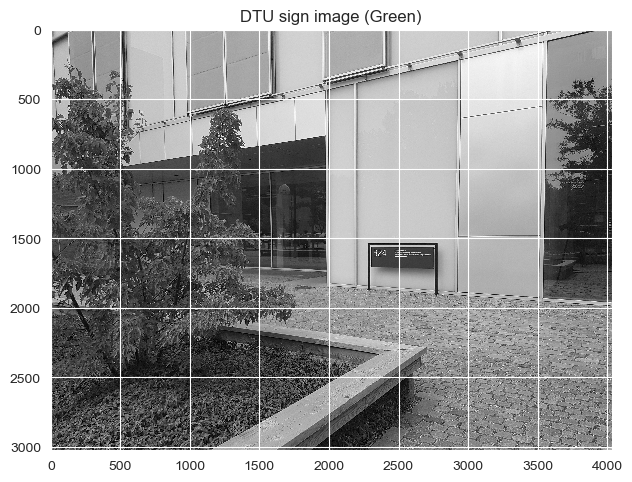

In [29]:
g_comp = dtu_org[:, :, 1]
io.imshow(g_comp)
plt.title('DTU sign image (Green)')
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\906383360.py:2: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(b_comp)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\906383360.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


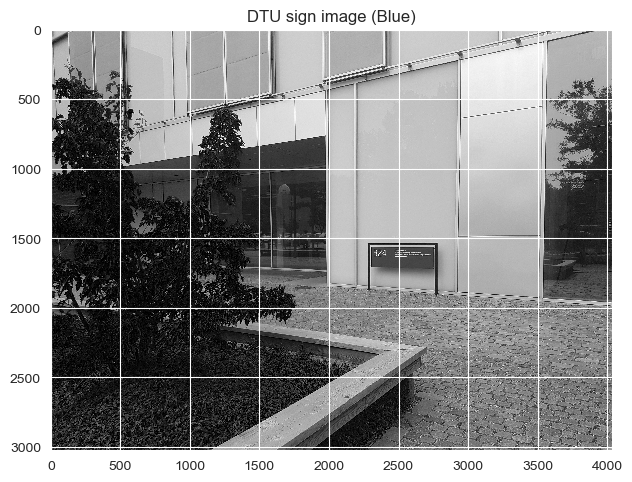

In [30]:
b_comp = dtu_org[:, :, 2]
io.imshow(b_comp)
plt.title('DTU sign image (Blue)')
io.show()

Exercise 24

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\72847325.py:1: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dtu_org)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\72847325.py:2: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


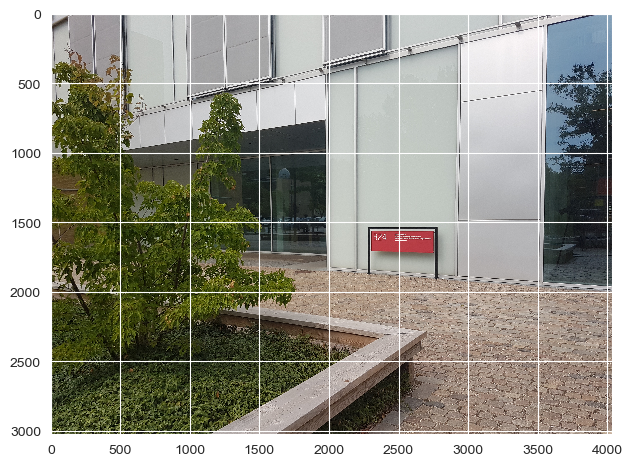

In [31]:
io.imshow(dtu_org)
io.show()

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1521938942.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dtu_marked)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\1521938942.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


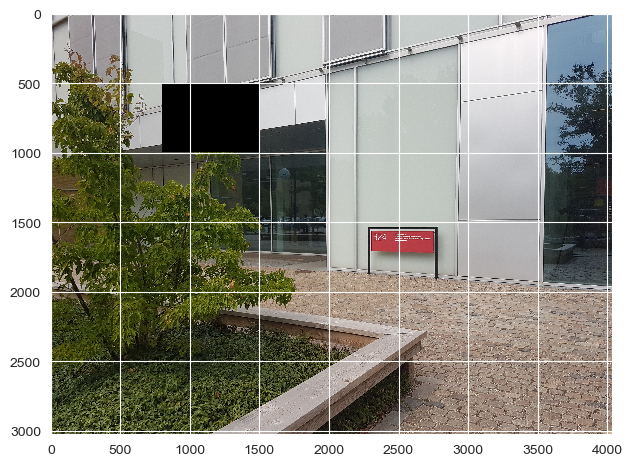

In [32]:
dtu_marked = np.copy(dtu_org)
dtu_marked[500:1000, 800:1500, :] = 0
io.imshow(dtu_marked)
io.show()

In [33]:
io.imsave("DTUSign1-marked.jpg", dtu_marked)

io.imsave("DTUSign1-marked.png", dtu_marked)

Exercise 26

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\788669916.py:3: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(dtu_signMarked)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\788669916.py:4: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


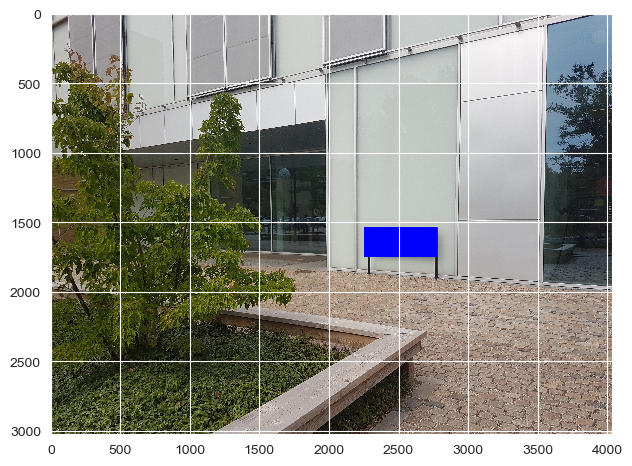

In [34]:
dtu_signMarked = np.copy(dtu_org)
dtu_signMarked[1540:1750, 2250:2775, :] = [0, 0, 255]
io.imshow(dtu_signMarked)
io.show()

io.imsave("DTUSign1-blueMarked.jpg", dtu_signMarked)

Exercise 27

C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2423720626.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im_rgb)
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\2423720626.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


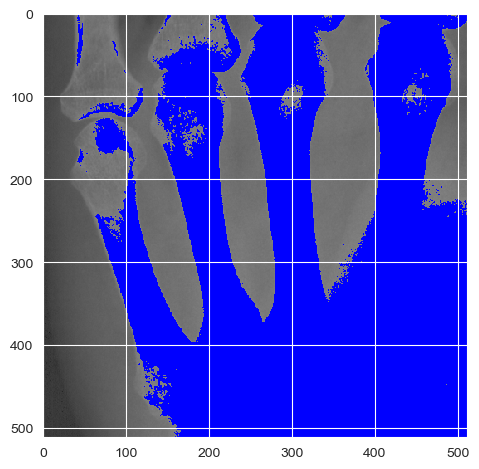

In [35]:
im_gray = io.imread(in_dir + "metacarpals.png")
im_rgb = color.gray2rgb(im_gray)
im_rgb = img_as_ubyte(im_rgb)

mask = im_gray > 128
im_rgb[mask] = [0, 0, 255]

io.imshow(im_rgb)
io.show()

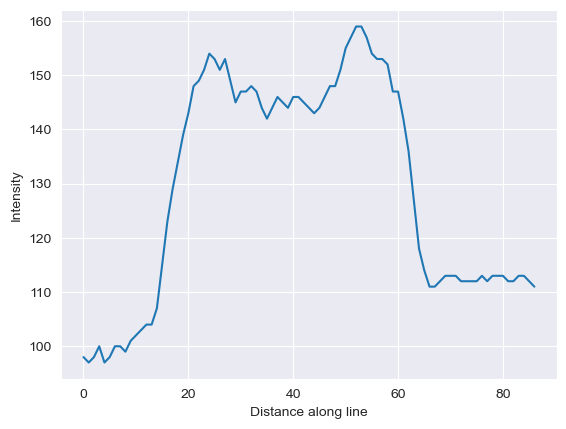

In [36]:
p = profile_line(im_gray, (342, 77), (320, 160))
plt.plot(p)
plt.ylabel('Intensity')
plt.xlabel('Distance along line')
plt.show()

There are spikes in intensity at the edges of the bone

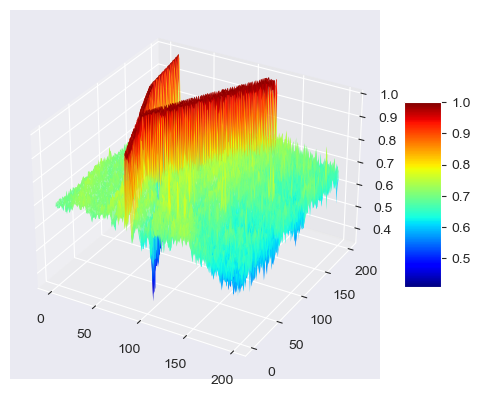

In [37]:
in_dir = "data/"
im_name = "road.png"
im_org = io.imread(in_dir + im_name)
im_gray = color.rgb2gray(im_org)
ll = 200
im_crop = im_gray[40:40 + ll, 150:150 + ll]
xx, yy = np.mgrid[0:im_crop.shape[0], 0:im_crop.shape[1]]
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(xx, yy, im_crop, rstride=1, cstride=1, cmap=plt.cm.jet,
                       linewidth=0)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

Exercise 29 and 30

In [38]:
im_name = "1-442.dcm"

ds = dicom.dcmread(in_dir + im_name)

print(ds)

Dataset.file_meta -------------------------------
(0002,0000) File Meta Information Group Length  UL: 174
(0002,0001) File Meta Information Version       OB: b'\x00\x01'
(0002,0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002,0003) Media Storage SOP Instance UID      UI: 61.7.148187188172271071649499494197343400503
(0002,0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002,0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002,0013) Implementation Version Name         SH: 'dcm4che-1.4.34'
-------------------------------------------------
(0008,0008) Image Type                          CS: ['DERIVED', 'SECONDARY']
(0008,0016) SOP Class UID                       UI: CT Image Storage
(0008,0018) SOP Instance UID                    UI: 61.7.148187188172271071649499494197343400503
(0008,0020) Study Date                          DA: '20140914'
(0008,0030) Study Time                          TM: ''
(0008,0050) Accession Number        

Shape of image: (512, 512)
Pixel data type: int16


C:\Users\frede\AppData\Local\Temp\ipykernel_17976\940722683.py:4: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
C:\Users\frede\AppData\Local\Temp\ipykernel_17976\940722683.py:5: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  io.show()


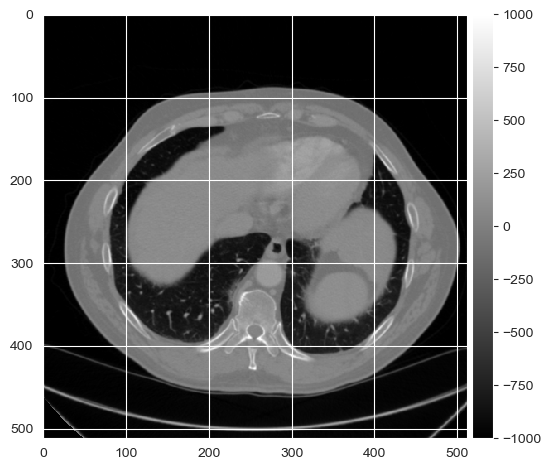

In [39]:
im = ds.pixel_array
print("Shape of image:", im.shape)
print("Pixel data type:", im.dtype)
io.imshow(im, vmin=-1000, vmax=1000, cmap='gray')
io.show()